In [1]:
import pandas as pd
tweet_Covid = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Covid.csv"), index_col=0)

In [2]:
tweet_Covid.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330567120091025412,2020-11-22 17:41:36,hairymarx keithwmacdonal maajidnawaz lbc...,-0.60000,Negative
1,1330567119264681985,2020-11-22 17:41:36,anti vaxxers think that if they don t get the ...,0.45625,Positive
2,1330567118765506560,2020-11-22 17:41:36,joncoopertweets i ve said all along if it s d...,0.00000,Neutral
3,1330567113078169606,2020-11-22 17:41:35,lkgwin mmpadellan will that trigger drumoft?...,0.50000,Positive
4,1330567108707676162,2020-11-22 17:41:34,government exploring modalities of emergency a...,0.00000,Neutral


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words("english")

print((tweet_Covid['full_text']).head())
print('-------Remove Stop Word------')
tweet_Covid['StopWords'] = tweet_Covid['full_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print((tweet_Covid['StopWords']).head())

0     hairymarx   keithwmacdonal   maajidnawaz  lbc...
1    anti vaxxers think that if they don t get the ...
2     joncoopertweets i ve said all along if it s d...
3     lkgwin  mmpadellan will that trigger drumoft?...
4    government exploring modalities of emergency a...
Name: full_text, dtype: object
-------Remove Stop Word------
0    hairymarx keithwmacdonal maajidnawaz lbc bbcne...
1    anti vaxxers think get covid vaccine going lin...
2    joncoopertweets said along dr. fauci approved ...
3    lkgwin mmpadellan trigger drumoft? so, ok matt...
4    government exploring modalities emergency auth...
Name: StopWords, dtype: object


In [4]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print((tweet_Covid['StopWords']).head())
print('-------Stemming------')
tweet_Covid['Stemming'] = tweet_Covid['StopWords'].astype(str).apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print((tweet_Covid['Stemming']).head())

0    hairymarx keithwmacdonal maajidnawaz lbc bbcne...
1    anti vaxxers think get covid vaccine going lin...
2    joncoopertweets said along dr. fauci approved ...
3    lkgwin mmpadellan trigger drumoft? so, ok matt...
4    government exploring modalities emergency auth...
Name: StopWords, dtype: object
-------Stemming------
0    hairymarx keithwmacdon maajidnawaz lbc bbcnew ...
1    anti vaxxer think get covid vaccin go line sho...
2    joncoopertweet said along dr. fauci approv get...
3    lkgwin mmpadellan trigger drumoft? so, ok matt...
4    govern explor modal emerg authoris covid vacci...
Name: Stemming, dtype: object


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print((tweet_Covid['Stemming']).head())
print('-------Lemmazation------')
tweet_Covid['Lemmatizing'] = tweet_Covid['Stemming'].astype(str).apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print((tweet_Covid['Lemmatizing']).head())

0    hairymarx keithwmacdon maajidnawaz lbc bbcnew ...
1    anti vaxxer think get covid vaccin go line sho...
2    joncoopertweet said along dr. fauci approv get...
3    lkgwin mmpadellan trigger drumoft? so, ok matt...
4    govern explor modal emerg authoris covid vacci...
Name: Stemming, dtype: object
-------Lemmazation------
0    hairymarx keithwmacdon maajidnawaz lbc bbcnew ...
1    anti vaxxer think get covid vaccin go line sho...
2    joncoopertweet said along dr. fauci approv get...
3    lkgwin mmpadellan trigger drumoft? so, ok matt...
4    govern explor modal emerg authoris covid vacci...
Name: Lemmatizing, dtype: object


In [6]:
from textblob import TextBlob
text = tweet_Covid["Lemmatizing"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    tweet_Covid.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        tweet_Covid.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        tweet_Covid.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        tweet_Covid.at[i, 'SentimentClass'] = SentimentClass 

In [7]:
tweet = tweet_Covid.to_csv("/Users/bahtinur/Desktop/Tweet/Covid.csv")

In [8]:
import pandas as pd

tweet_Covid = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Covid.csv"), index_col=0)

In [9]:
tweet_Covid.drop(['StopWords', 'Stemming', 'full_text'], axis=1, inplace = True)

tweet_Covid.head()

,id,created_at,Sentiment,SentimentClass,Lemmatizing
0,1330567120091025412,2020-11-22 17:41:36,-0.8000,Negative,hairymarx keithwmacdon maajidnawaz lbc bbcnew ...
1,1330567119264681985,2020-11-22 17:41:36,0.6875,Positive,anti vaxxer think get covid vaccin go line sho...
2,1330567118765506560,2020-11-22 17:41:36,0.0000,Neutral,joncoopertweet said along dr. fauci approv get...
3,1330567113078169606,2020-11-22 17:41:35,0.5000,Positive,"lkgwin mmpadellan trigger drumoft? so, ok matt..."
4,1330567108707676162,2020-11-22 17:41:34,0.0000,Neutral,govern explor modal emerg authoris covid vacci...


In [10]:
tweet_Covid.rename(columns={'Lemmatizing':'text'}, inplace=True)
tweet_Covid.head()

,id,created_at,Sentiment,SentimentClass,text
0,1330567120091025412,2020-11-22 17:41:36,-0.8000,Negative,hairymarx keithwmacdon maajidnawaz lbc bbcnew ...
1,1330567119264681985,2020-11-22 17:41:36,0.6875,Positive,anti vaxxer think get covid vaccin go line sho...
2,1330567118765506560,2020-11-22 17:41:36,0.0000,Neutral,joncoopertweet said along dr. fauci approv get...
3,1330567113078169606,2020-11-22 17:41:35,0.5000,Positive,"lkgwin mmpadellan trigger drumoft? so, ok matt..."
4,1330567108707676162,2020-11-22 17:41:34,0.0000,Neutral,govern explor modal emerg authoris covid vacci...


In [11]:
sent = {'Positive':'1','Negative':'2','Neutral':'0'}
tweet_Covid['SentimentClass'] = tweet_Covid['SentimentClass'].map(sent)

In [12]:
tweet_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4812
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4813 non-null   int64  
 1   created_at      4813 non-null   object 
 2   Sentiment       4813 non-null   float64
 3   SentimentClass  4813 non-null   object 
 4   text            4813 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 225.6+ KB


In [26]:
sent = {'1':'Positive','2':'Negative','0':'Neutral'}
tweet_Covid['SentimentClass'] = tweet_Covid['SentimentClass'].map(sent)
tweet_Covid['SentimentClass'].value_counts()

Neutral     1891
Positive    1886
Negative    1036
Name: SentimentClass, dtype: int64

<AxesSubplot:>

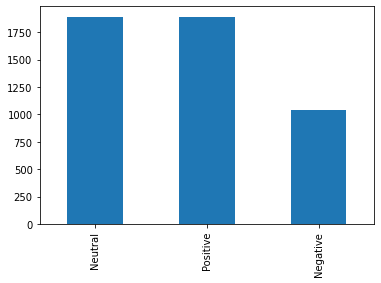

In [27]:
import matplotlib.pyplot as plt
tweet_Covid['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [14]:
X = tweet_Covid.iloc[:, 4].values
y = tweet_Covid.iloc[:, 3].values

In [15]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=250, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(X).toarray()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [17]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4813, 250), (4813,), (4331, 250), (4331,), (482, 250), (482,))

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_predRF = rfc.predict(X_test)
score_RF = rfc.score(X_test, y_test)
print(confusion_matrix(y_test,y_predRF))
print(classification_report(y_test,y_predRF))
print(accuracy_score(y_test, y_predRF))

[[179  10  10]
 [ 47 139   7]
 [ 44  24  22]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       199
           1       0.80      0.72      0.76       193
           2       0.56      0.24      0.34        90

    accuracy                           0.71       482
   macro avg       0.68      0.62      0.62       482
weighted avg       0.70      0.71      0.68       482

0.7053941908713693


In [19]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVC = svclassifier.predict(X_test)
score_SVC = svclassifier.score(X_test, y_test)
print(confusion_matrix(y_test,y_predSVC))
print(classification_report(y_test,y_predSVC))
print(accuracy_score(y_test, y_predSVC))

[[193   5   1]
 [ 59 125   9]
 [ 53  24  13]]
              precision    recall  f1-score   support

           0       0.63      0.97      0.77       199
           1       0.81      0.65      0.72       193
           2       0.57      0.14      0.23        90

    accuracy                           0.69       482
   macro avg       0.67      0.59      0.57       482
weighted avg       0.69      0.69      0.65       482

0.6867219917012448


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predNB = NB_model.predict(X_test)
score_NB = NB_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predNB))
print(classification_report(y_test,y_predNB))
print(accuracy_score(y_test, y_predNB))

[[157  40   2]
 [ 43 148   2]
 [ 43  35  12]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       199
           1       0.66      0.77      0.71       193
           2       0.75      0.13      0.23        90

    accuracy                           0.66       482
   macro avg       0.69      0.56      0.55       482
weighted avg       0.67      0.66      0.62       482

0.6576763485477178


In [21]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predLR = LR_model.predict(X_test)
score_LR = LR_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predLR))
print(classification_report(y_test,y_predLR))
print(accuracy_score(y_test, y_predLR))

[[178  13   8]
 [ 48 136   9]
 [ 46  25  19]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.76       199
           1       0.78      0.70      0.74       193
           2       0.53      0.21      0.30        90

    accuracy                           0.69       482
   macro avg       0.65      0.60      0.60       482
weighted avg       0.68      0.69      0.67       482

0.6908713692946058


In [24]:
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
score_KNN = model_KNN.score(X_test,y_test)

print(confusion_matrix(y_test,y_predKNN))
print(classification_report(y_test,y_predKNN))
print(accuracy_score(y_test, y_predKNN))

[[184   7   8]
 [146  44   3]
 [ 77   6   7]]
              precision    recall  f1-score   support

           0       0.45      0.92      0.61       199
           1       0.77      0.23      0.35       193
           2       0.39      0.08      0.13        90

    accuracy                           0.49       482
   macro avg       0.54      0.41      0.36       482
weighted avg       0.57      0.49      0.42       482

0.487551867219917


In [25]:
from texttable import Texttable
# texttable takes the first reocrd in the list as the column names
# of the table
l = [["CLASSIFICATION", "ACCURACY"],['LogisticRegression', score_LR],['RandomForest', score_RF],['K-NearestNeighbors',score_KNN],['MultinominalNaiveBayes',score_NB], ['SupportVector', score_SVC]]
table = Texttable()
table.add_rows(l)
print(table.draw())

+------------------------+----------+
|     CLASSIFICATION     | ACCURACY |
+========================+==========+
| LogisticRegression     | 0.691    |
+------------------------+----------+
| RandomForest           | 0.705    |
+------------------------+----------+
| K-NearestNeighbors     | 0.488    |
+------------------------+----------+
| MultinominalNaiveBayes | 0.658    |
+------------------------+----------+
| SupportVector          | 0.687    |
+------------------------+----------+
